<a href="https://colab.research.google.com/github/Vineet2107/HSO201_CourseProject/blob/main/IME692_coure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [53]:
df=pd.read_csv('/content/drive/MyDrive/Course Project IME692/voweltrain_ .csv')
df1=pd.read_csv('/content/drive/MyDrive/Course Project IME692/voweltest_.csv')

In [54]:
df.head(15)

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
5,6,6,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365
6,7,7,-3.482,2.524,-0.433,1.048,-1.995,0.902,0.322,0.450,0.377,-0.366
7,8,8,-3.941,2.305,0.124,1.771,-1.815,0.593,-0.435,0.992,0.575,-0.301
8,9,9,-3.860,2.116,-0.939,0.688,-0.675,1.679,-0.512,0.928,-0.167,-0.434
9,10,10,-3.648,1.812,-1.378,1.578,0.065,1.577,-0.466,0.702,0.060,-0.836


In [55]:
df.y=df.y-1
df1.y=df1.y-1

In [29]:
df

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,6,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,525,7,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,526,8,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,527,9,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [58]:
y_train = tf.keras.utils.to_categorical(df.y)
y_test = tf.keras.utils.to_categorical(df1.y)

In [59]:
y_train.shape

(528, 11)

In [60]:
y_test.shape

(462, 11)

In [32]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [88]:
x=df[df.columns[2:12]]

In [89]:
x1=df1[df1.columns[2:12]]

In [90]:
x

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...
523,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [91]:
x_train=np.array(x)
x_test=np.array(x1)

In [92]:
x_train.shape

(528, 10)

In [93]:
x_test.shape

(462, 10)

In [100]:
perms = np.random.permutation(528)

In [101]:
x_train=x_train[perms]
y_train=y_train[perms]

In [102]:
x_train

array([[-4.261,  1.827, -0.482, ...,  0.05 , -0.112,  0.321],
       [-3.601,  0.742, -0.238, ...,  0.844,  0.558,  0.659],
       [-2.55 ,  2.629,  0.084, ...,  0.961,  0.032, -0.589],
       ...,
       [-2.558,  0.755, -0.66 , ..., -0.531, -0.062,  0.418],
       [-2.559,  2.3  ,  0.408, ...,  0.975,  0.07 , -0.47 ],
       [-3.406,  2.403,  1.025, ...,  1.541, -0.304, -0.671]])

In [103]:
X_train=x_train
X_test=x_test

In [108]:
#imported necessary packages for model
#import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [109]:
input_shape = [x_train.shape[1]]

In [110]:
#sequential MLP model 
model = tf.keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(11, activation = 'sigmoid'),
])


In [111]:
#compiling model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

Epoch 1/500
30/30 [==============================] - 1s 10ms/step - loss: 2.9324 - accuracy: 0.0737 - val_loss: 2.4566 - val_accuracy: 0.0943
Epoch 2/500
30/30 [==============================] - 0s 4ms/step - loss: 2.6213 - accuracy: 0.1095 - val_loss: 2.4200 - val_accuracy: 0.1321
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 2.4723 - accuracy: 0.1684 - val_loss: 2.3680 - val_accuracy: 0.1698
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 2.3361 - accuracy: 0.1874 - val_loss: 2.2919 - val_accuracy: 0.1887
Epoch 5/500
30/30 [==============================] - 0s 4ms/step - loss: 2.2148 - accuracy: 0.2274 - val_loss: 2.1845 - val_accuracy: 0.2830
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 2.0967 - accuracy: 0.2421 - val_loss: 2.0782 - val_accuracy: 0.2453
Epoch 7/500
30/30 [==============================] - 0s 4ms/step - loss: 2.0192 - accuracy: 0.2989 - val_loss: 1.9824 - val_accuracy: 0.3208
Epoch 8/500


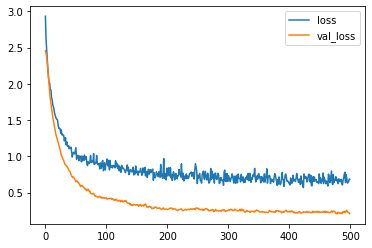

In [112]:
#training model
epochs = 500
history = model.fit(x_train, y_train, validation_split=0.1, batch_size=16,
                    epochs=epochs, verbose=1,
                    #validation_data=(X_test, y_test)
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [68]:
import sklearn

In [44]:
#SVM classifier using using linear kernel 
from sklearn.svm import SVC  
model_svm = SVC(kernel='linear') 

#trained svm classifier
model_svm.fit(y_train, y_train)

ValueError: ignored

In [45]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

In [47]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

ValueError: ignored

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [114]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [115]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 56.27705627705628
Accuracy with k=1 56.27705627705628
